In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors

In [2]:
paths=[r"C:\Users\rishi\ml_projects\climate\500_23\CO\response.tiff",
       r"C:\Users\rishi\ml_projects\climate\500_23\HCHO\response.tiff",
       r"C:\Users\rishi\ml_projects\climate\500_23\NO2\response.tiff",
       r"C:\Users\rishi\ml_projects\climate\500_23\O3\response.tiff",
       r"C:\Users\rishi\ml_projects\climate\500_23\SO2\response.tiff"]

paths_18=[r"C:\Users\rishi\ml_projects\climate\500_18\CO\response.tiff",
          r"C:\Users\rishi\ml_projects\climate\500_18\HCHO\response.tiff",
          r"C:\Users\rishi\ml_projects\climate\500_18\NO2\response.tiff",
          r"C:\Users\rishi\ml_projects\climate\500_18\O3\response.tiff",
          r"C:\Users\rishi\ml_projects\climate\500_18\SO2\response.tiff",
]
tif_paths=paths_18+paths


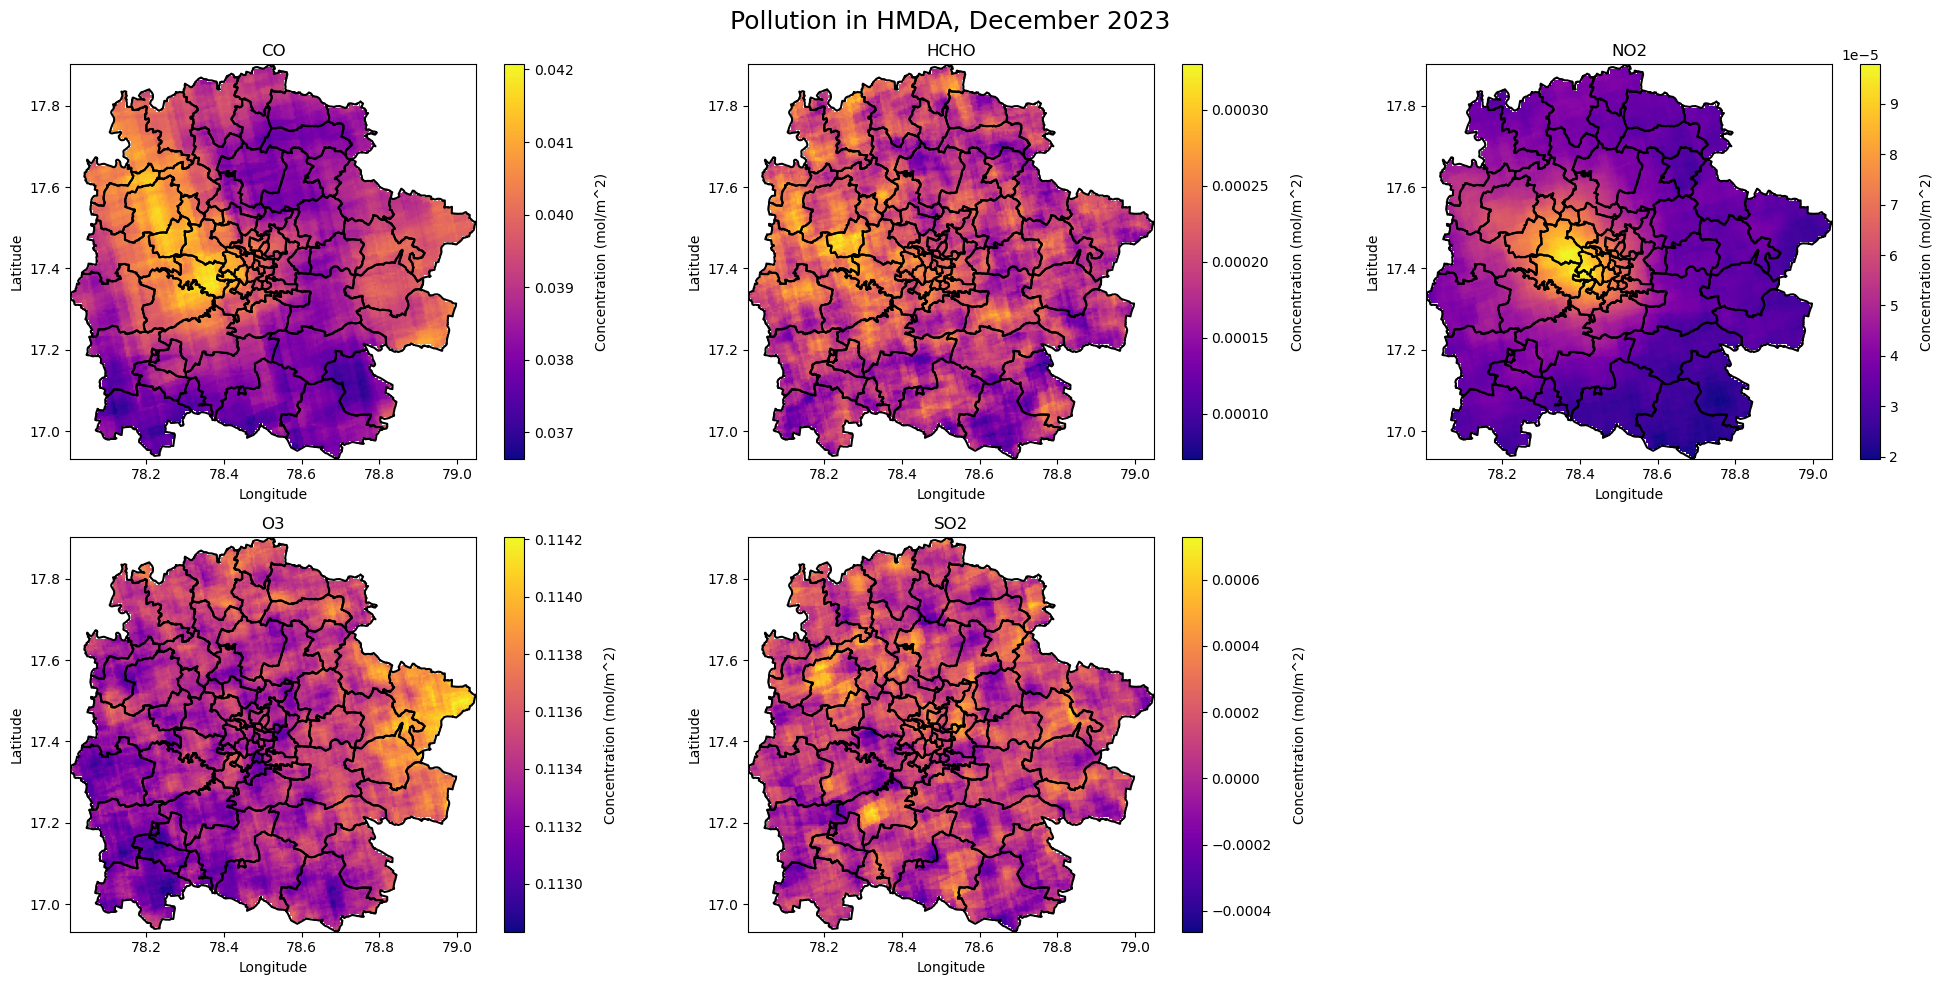

In [3]:
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
import os

# Load the shapefile
shapefile_path = r'C:\Users\rishi\ml_projects\climate\hmda_boundary\hmda_boundary.shp'
gdf = gpd.read_file(shapefile_path)

# Initialize a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Pollution in HMDA, December 2023', fontsize=18)

for i, tif_file in enumerate(paths):
    with rasterio.open(tif_file) as dataset:
        # Mask the dataset with the shapefile boundary to make areas outside white
        masked_data, masked_transform = mask(dataset, gdf.geometry, crop=True, nodata=np.nan)
        
        # Determine the appropriate axis for each image
        row = i // 3
        col = i % 3
        ax = axes[row, col]

        # Title for each subplot based on the file name
        m = tif_file.split(os.sep)
        show(masked_data[0], transform=masked_transform, ax=ax, cmap='plasma')
        ax.set_title(f'{m[6]}')
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')

        # Add a colorbar for each subplot
        cbar = fig.colorbar(ax.images[0], ax=ax, orientation='vertical', fraction=0.04)
        cbar.set_label('Concentration (mol/m^2)', rotation=90, labelpad=15)
        
        # Plot the shapefile boundary on top of the image
        gdf.boundary.plot(ax=ax, edgecolor='black')

# Hide the last axis if there are only five images
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


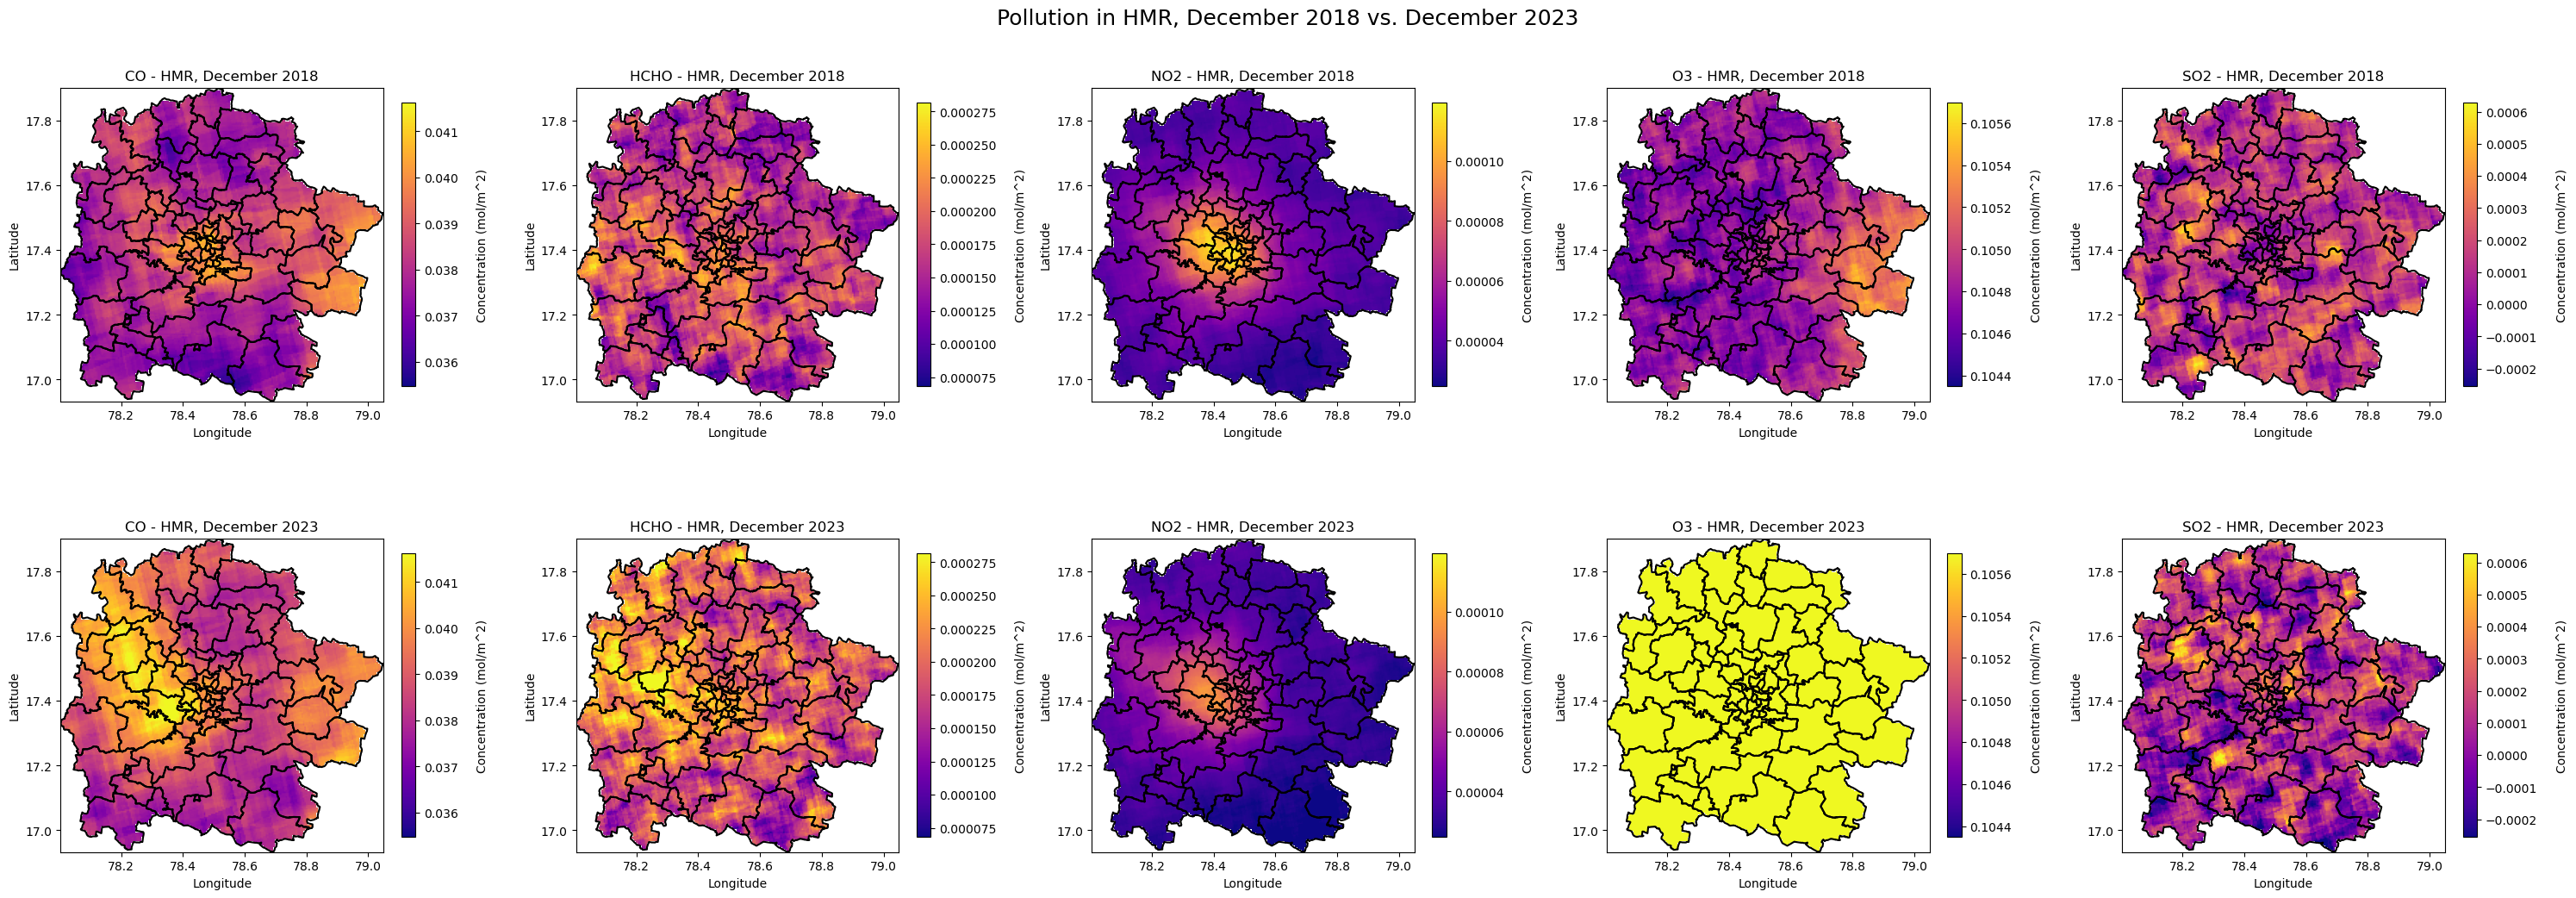

: 

In [ ]:

shapefile_path = r'C:\Users\rishi\ml_projects\climate\hmda_boundary\hmda_boundary.shp'
gdf = gpd.read_file(shapefile_path)

# Initialize a 2x3 grid of subplots
fig, axes = plt.subplots(2,5, figsize=(30,11))
fig.suptitle('Pollution in HMR, December 2018 vs. December 2023', fontsize=18)
cmap_scales = []

for i, tif_file in enumerate(tif_paths):
    if(i in range (0,5)):
        with rasterio.open(tif_file) as src:
            # Mask the dataset with the shapefile boundary to make areas outside white
            masked_data, masked_transform = mask(src, gdf.geometry, crop=True, nodata=np.nan)
            raster_data = src.read(1)
            bounds = src.bounds
            vmin, vmax = np.nanmin(raster_data), np.nanmax(raster_data)  # Scale
            cmap_scales.append((vmin, vmax))

            # Determine the appropriate axis for each image
            ax=axes[0,i]

            # Title for each subplot based on the file name
            m = tif_file.split(os.sep)
            show(masked_data[0], transform=masked_transform, ax=ax, cmap='plasma', vmin=vmin, vmax=vmax)
            ax.set_title(f'{m[6]} - HMR, December 2018')
            ax.set_xlabel('Longitude')
            ax.set_ylabel('Latitude')
            
            # Add a colorbar for each subplot
            cbar = fig.colorbar(ax.images[0], ax=ax, orientation='vertical', fraction=0.04)
            cbar.set_label('Concentration (mol/m^2)', rotation=90, labelpad=15)
            
            # Plot the shapefile boundary on top of the image
            gdf.boundary.plot(ax=ax, edgecolor='black')
    else:
        with rasterio.open(tif_file) as src:
            # Mask the dataset with the shapefile boundary to make areas outside white
            masked_data, masked_transform = mask(src, gdf.geometry, crop=True, nodata=np.nan)
            raster_data = src.read(1)
            bounds = src.bounds
            vmin, vmax = np.nanmin(raster_data), np.nanmax(raster_data)
            # if(i!=3+5):
            vmin,vmax=cmap_scales[i-5]
            # Determine the appropriate axis for each image
            ax=axes[1,i-5]

            # Title for each subplot based on the file name
            m = tif_file.split(os.sep)
            show(masked_data[0], transform=masked_transform, ax=ax, cmap='plasma', vmin=vmin, vmax=vmax)
            ax.set_title(f'{m[6]} - HMR, December 2023')
            ax.set_xlabel('Longitude')
            ax.set_ylabel('Latitude')

            # Add a colorbar for each subplot
            cbar = fig.colorbar(ax.images[0], ax=ax, orientation='vertical', fraction=0.04)
            cbar.set_label('Concentration (mol/m^2)', rotation=90, labelpad=15)
            
            # Plot the shapefile boundary on top of the image
            gdf.boundary.plot(ax=ax, edgecolor='black')


plt.tight_layout()
plt.savefig("Pollution_HMR_200.jpg", dpi=200, bbox_inches='tight')
plt.show()
